In [1]:
from utils import load_combined_df

combined = load_combined_df()

X_cols = ['VH', 'VV', 'HH', 'HV', 'Angle']
y_col = ['SM (Combined)']

num_features = len(X_cols)

2025-10-07 00:37:38.021140: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loaded combined DF with shape: (745, 16)


Split sizes:
  Train    - X: (447, 5), y: 447 (60.0%)
  Conformal- X: (149, 5), y: 149 (20.0%)
  Test     - X: (149, 5), y: 149 (20.0%)
  Original data rows: 745
Y preds shape - (149,)
interval shape - (149, 2, 1)
Upper interval shape - (149,)
Lower interval shape - (149,)

--- Model Evaluation ---
Effective Coverage: 0.913 (target: 0.95)
Average Interval Width: 26.665
------------------------



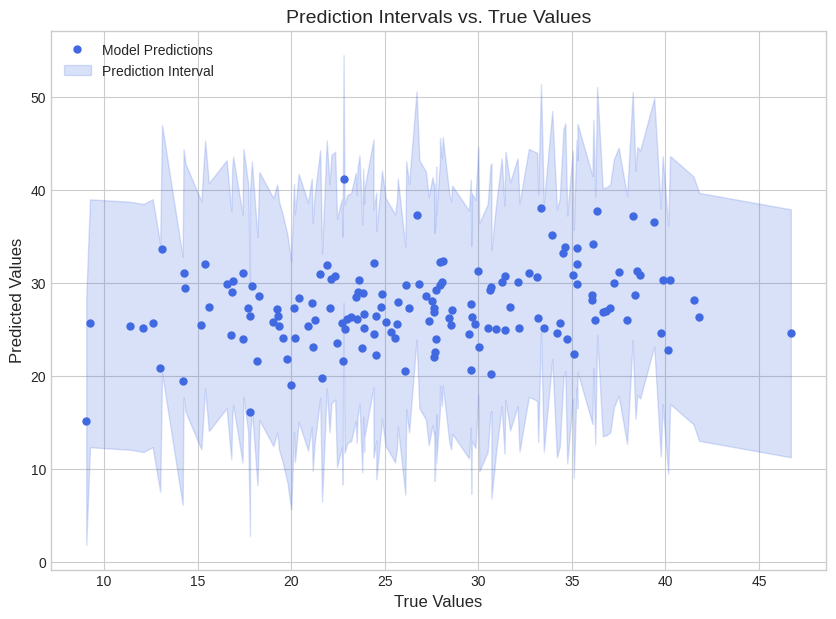

In [2]:
from model_experiments import ConformalRegression

exp = ConformalRegression(data=combined, features=X_cols, target=y_col[0], random_seed=15)
exp.y_test
exp.run_experiment(estimator_str="RandomForest")

Loaded combined DF with shape: (745, 16)
Data prepared for Split Conformal methods.
Data prepared for Cross-Conformal methods.

--- Running Experiment: RF_Split ---
Coverage: 0.913 (Target: 0.95) | Width: 26.665

--- Running Experiment: XGB_Split ---
Coverage: 0.960 (Target: 0.95) | Width: 32.027

--- Running Experiment: RF_Cross-Conformal ---
Coverage: 0.980 (Target: 0.95) | Width: 30.052

--- Running Experiment: XGB_Cross-Conformal ---
Coverage: 0.993 (Target: 0.95) | Width: 34.615

Generating Model Comparison Plot...


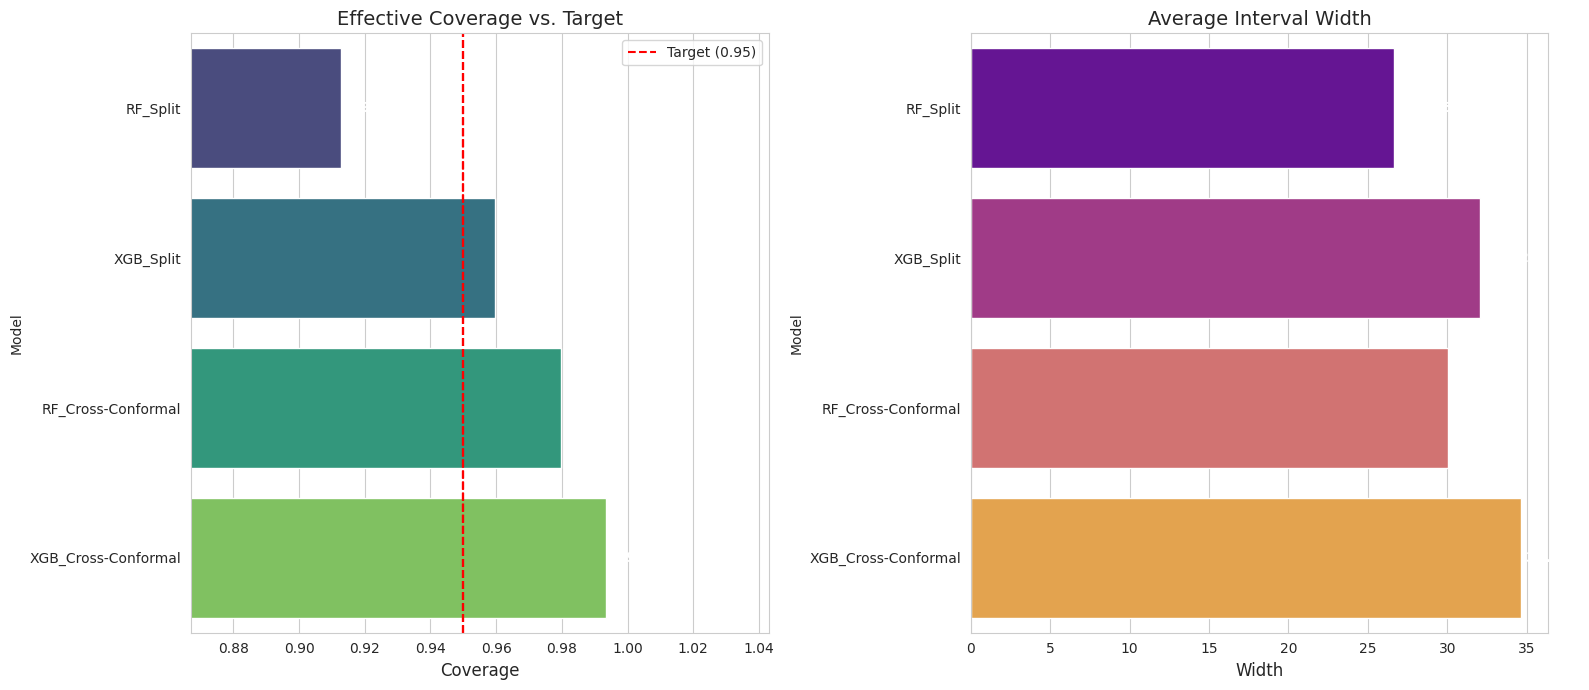


Generating Interval Width vs. Prediction Plots...


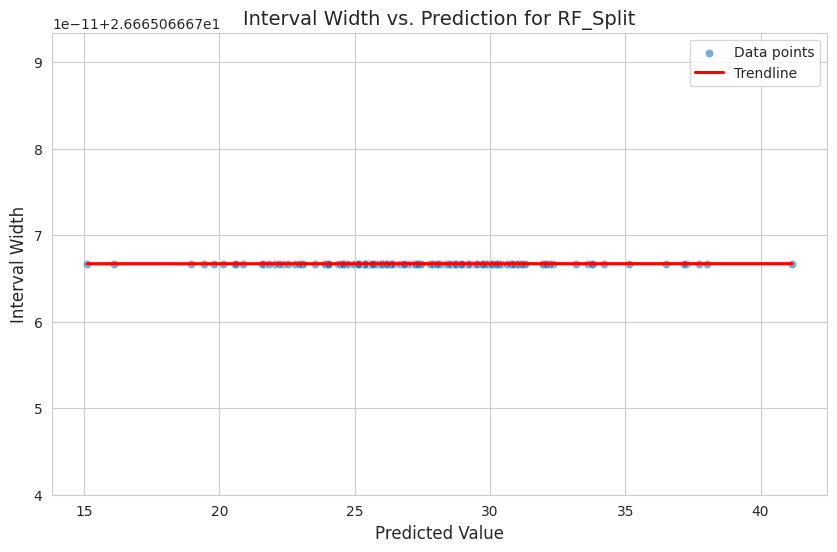

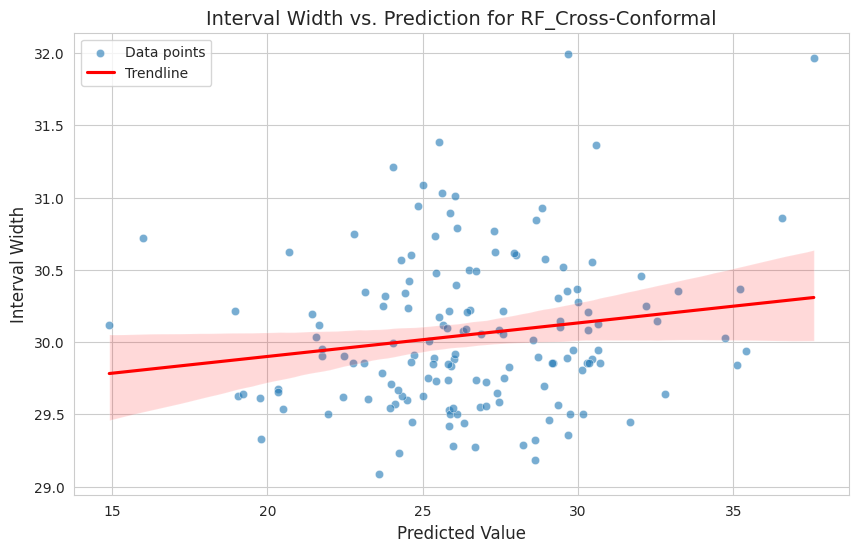


Generating Coverage Calibration Plot...

--- Running Calibration Study for RF_Cross-Conformal ---


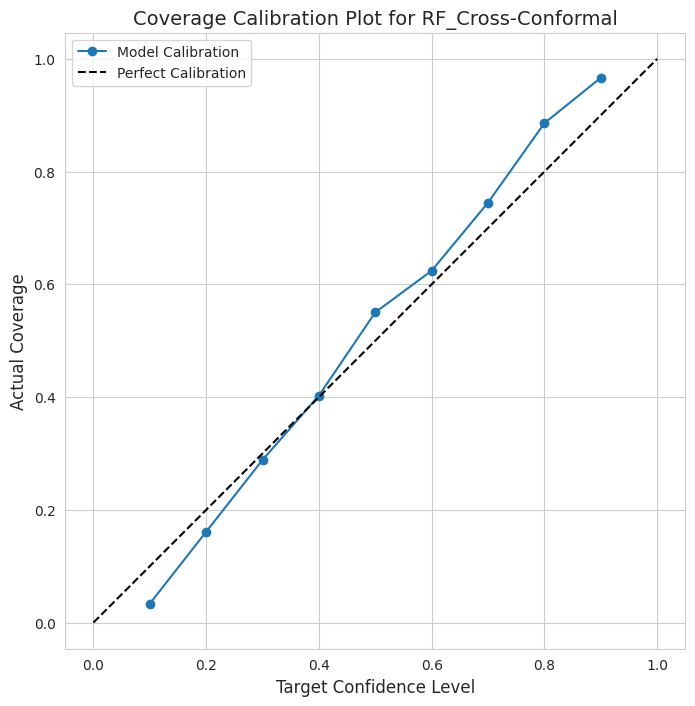

In [2]:
from utils import load_combined_df
from model_experiments import NewConformalRegression as ConformalRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from mapie.regression import SplitConformalRegressor, CrossConformalRegressor

# 1. Load your data
combined = load_combined_df()

# 2. Define features and target
X_cols = ['VH', 'VV', 'HH', 'HV', 'Angle']
y_col = 'SM (Combined)' # Should be a string, not a list
RANDOM_SEED = 15

# 3. Define the experiments you want to run
#    We will compare Split vs. Cross-Conformal methods.
experiments = [
    {
        'name': 'RF_Split',
        'mapie_method': SplitConformalRegressor,
        'estimator': RandomForestRegressor(random_state=RANDOM_SEED),
        'confidence': 0.95
    },
    {
        'name': 'XGB_Split',
        'mapie_method': SplitConformalRegressor,
        'estimator': XGBRegressor(random_state=RANDOM_SEED),
        'confidence': 0.95
    },
    {
        'name': 'RF_Cross-Conformal',
        'mapie_method': CrossConformalRegressor,
        'estimator': RandomForestRegressor(random_state=RANDOM_SEED),
        'confidence': 0.95
    },
    {
        'name': 'XGB_Cross-Conformal',
        'mapie_method': CrossConformalRegressor,
        'estimator': XGBRegressor(random_state=RANDOM_SEED),
        'confidence': 0.95
    }
]

# 4. Initialize and run all experiments
conformal_exp = ConformalRegression(
    data=combined,
    features=X_cols,
    target=y_col,
    random_seed=RANDOM_SEED
)
conformal_exp.run_experiments(experiments)


# --- 5. Generate Advanced Plots for Analysis ---

# a) Model Comparison Plot: Compare all models on coverage and width
print("\nGenerating Model Comparison Plot...")
conformal_exp.plot_model_comparison()


# b) Interval Width vs. Prediction Plot: Check for adaptive intervals
print("\nGenerating Interval Width vs. Prediction Plots...")
conformal_exp.plot_interval_width_vs_prediction('RF_Split')
conformal_exp.plot_interval_width_vs_prediction('RF_Cross-Conformal')


# c) Coverage Calibration Plot: Check if the model is well-calibrated
print("\nGenerating Coverage Calibration Plot...")
# We'll test the calibration of our best-performing model (e.g., RandomForest with Cross-Conformal)
calibration_config = {
    'name': 'RF_Cross-Conformal',
    'mapie_method': CrossConformalRegressor,
    'estimator': RandomForestRegressor(random_state=RANDOM_SEED)
}
conformal_exp.plot_coverage_calibration(calibration_config)
